[View in Colaboratory](https://colab.research.google.com/github/Ibrahim-Alkhalil/hello-world/blob/master/housing.ipynb)

Predicting the housing prices of California City. This notebook uses simple Linear Regression model with proper visualizations and descriptions.

## Importing Libraries and Dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [3]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing[housing['total_bedrooms'].isnull()]
housing.loc[290]

longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms             NaN
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
Name: 290, dtype: object

### Graph Visualizations for all given attributes

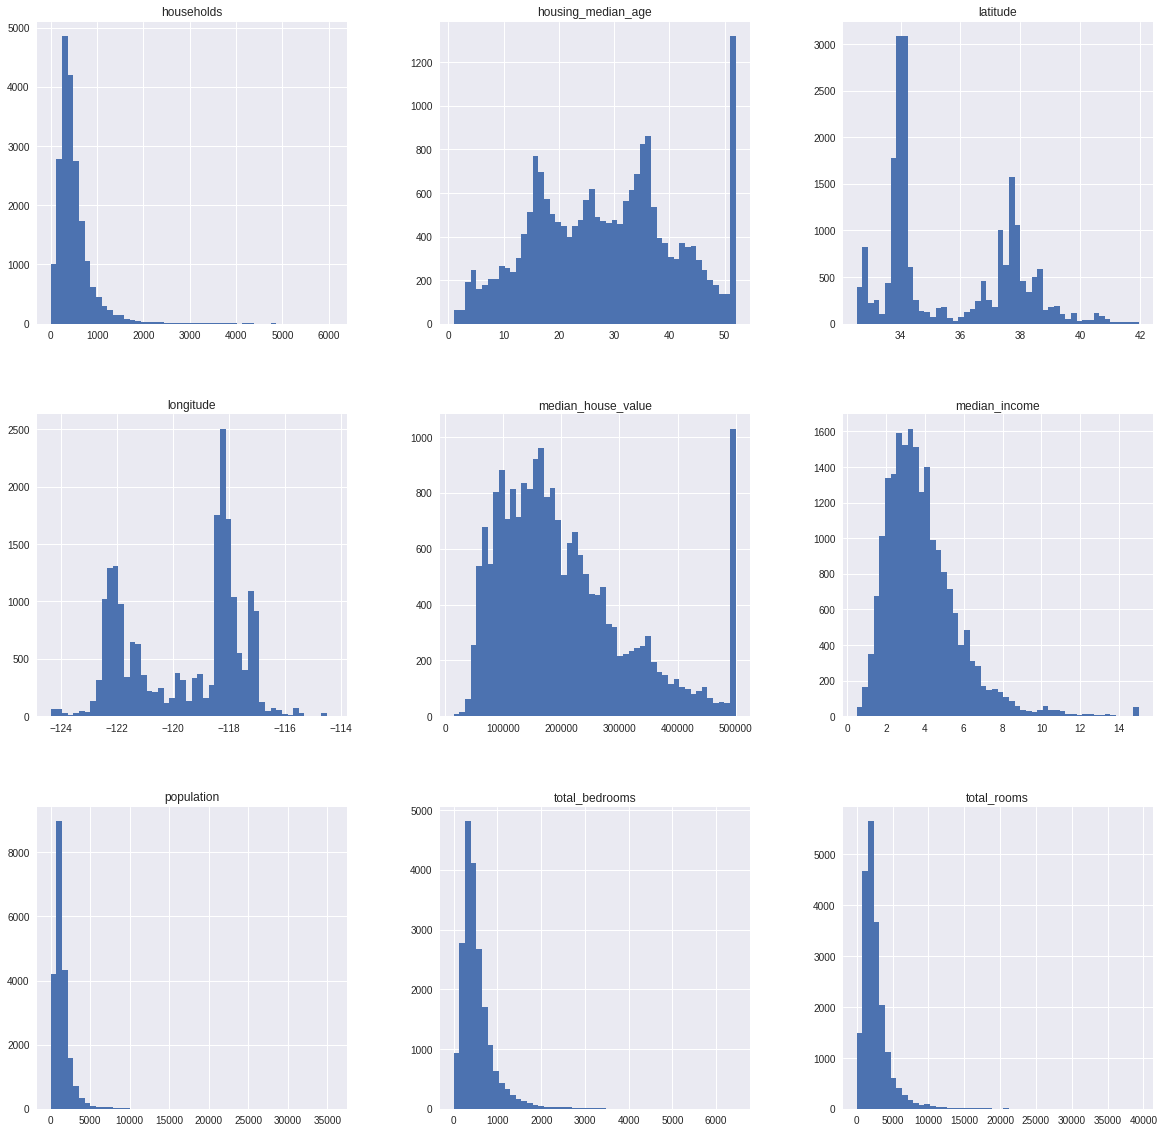

In [6]:
housing.hist(bins=50, figsize=(20,20))
plt.show()

### Fillling all NAN values of Dataframe with Mean value

In [7]:
housing['total_bedrooms'][housing['total_bedrooms'].isnull()] = np.mean(housing['total_bedrooms'])
housing.loc[290]

longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms         537.871
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
Name: 290, dtype: object

### Calculating Average Rooms and Bedrooms

In [8]:
housing['avg_rooms'] = housing['total_rooms']/housing['households']
housing['avg_bedrooms'] = housing['total_bedrooms']/housing['households']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081


### Finding correlation between the predictors

In [9]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.011079
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.062414
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.054704
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.133798,0.009005
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.001535,0.039920
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.074885
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.066444
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.326895,-0.047291
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.044265
avg_rooms,-0.027540,0.106389,-0.153277,0.133798,0.001535,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.741273


### Calculating population per household

In [10]:
housing['pop_household'] = housing['population']/housing['households']
housing[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,1.103627,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.951362,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,1.061824,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,1.117647,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.990196,2.172269


In [11]:
housing['NEAR BAY']=0
housing['INLAND']=0
housing['<1H OCEAN']=0
housing['ISLAND']=0
housing['NEAR OCEAN']=0
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0,0,0,0,0


### Converting the ocean proximity data to one-hot vectors 

In [12]:
housing.loc[housing['ocean_proximity']=='NEAR BAY','NEAR BAY']=1
housing.loc[housing['ocean_proximity']=='INLAND','INLAND']=1
housing.loc[housing['ocean_proximity']=='<1H OCEAN','<1H OCEAN']=1
housing.loc[housing['ocean_proximity']=='ISLAND','ISLAND']=1
housing.loc[housing['ocean_proximity']=='NEAR OCEAN','NEAR OCEAN']=1
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,1,0,0,0,0


## Applying Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split


train_x = housing.drop(['total_rooms','total_bedrooms','households',
                        'ocean_proximity','median_house_value'],axis=1)
train_y = housing['median_house_value']

X,test_x,Y,test_y = train_test_split(train_x, train_y, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
clf = LinearRegression()
clf.fit(np.array(X),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
import math

def roundup(x):
   return int(math.ceil(x / 100.0)) * 100 
pred = list(map(roundup,clf.predict(test_x)))

print(pred[:10])
test_y[:10]

[205600, 207700, 156400, 226700, 198300, 192800, 207600, 244900, 60500, 409900]


10918    159100.0
14853    103400.0
4872     127300.0
16863    229100.0
3691     154300.0
11978    116400.0
4696     453400.0
15159    165800.0
1107      97200.0
8987     439100.0
Name: median_house_value, dtype: float64

### Calculating root mean squared error in the regression model

In [16]:
from sklearn.metrics import mean_squared_error

predictions = clf.predict(test_x)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
rmse

71621.4713222796